## 用文字探勘方式找出臺灣各縣市自行車道路難度指數分布狀況與共同特性

### 各縣市自行車道路資訊

In [204]:
import jieba
import jieba.analyse
import pandas as pd
import numpy
from collections import Counter

In [205]:
orgdata = pd.read_csv('bike_road_list_pandas.csv')

In [206]:
orgdata.head()

,縣市,自行車道路名稱,簡介,挑戰指數,總計長度,路面狀況,重點提醒
0,台北市,基隆河沿岸自行車道,曾幾何時，基隆河已不再是水患的根源地，她廣袤的河濱腹地，已成為台北市的「城市之肺」，在有計畫...,2級。適合有中程騎乘經驗者。,左岸全長為18.1公里，右岸全長17.6公里。出入口多，可隨喜好選擇騎乘段落。,多為柏油路，平整好騎。且為自行車專用道，安全無虞。,可由大直橋銜接兩岸，但建議親子同遊時左右岸分日完成，遊程約安排在3小時上下，以免消耗太多體力。
1,台北市,景美舊橋至社子島自行車道,台北的自行車網路極為綿密，沿著汀州路防洪壁的任何一道水門走出去，都可以通往景美溪自行車道，以...,3級。若要騎完全程，則適合有長途經驗者。,由景美舊橋至社子島，全長27.08公里，出入口多，可隨喜好選擇段落騎乘。,全程柏油路面無坑洞，平整好騎，且騎經多處河濱公園，不愁沒地方休息。,該路段適合親子共騎，各租借站亦有童車可出租。惟路程較長，需注意幼兒的體能狀況。
2,新北市,八里左岸自行車道,您知道嗎？從二重疏洪道有條風景優美的自行車道，可以一直騎到八里左岸喔！二重疏洪道有多座規劃完...,3級。若欲騎完全程，建議有長途騎乘經驗較佳。,全程25公里，出入口多可隨喜好選擇騎乘段落。,多為柏油路，平整好騎，且人車分道，安全無虞。,建議親子同遊時，八里與二重疏洪道路分日完成，遊程約安排在3小時上下，以免消耗太多體力。
3,新北市,大漢溪右岸新店土城線,大漢、新店溪的河濱公園是附近居民散步休閒的最佳空間。這條自行車道橫跨了新店、永和、板橋、土城...,3級。若欲騎完全程，建議有長途騎乘經驗較佳。,大漢溪右岸、新店至土城30公里，出入口多，可隨喜好選擇騎乘段落。,多為柏油路，平整好騎，且人車分道，安全無虞。,光復賞鳥公園有自行車天橋可利用，惟上下坡時需注意安全。河濱公園內較無販賣部，部分定點於租借站...
4,基隆市,北寧路自行車道,北寧路自行車道是由八斗子海濱公園，一直到平浪橋的這段自行車道。此段路程風光明媚，海天相伴，美...,1級。適合親子共遊，但上下橋請注意兒童安全。,從平浪橋段經潮境公園至八斗子海濱公園。全長2公里。,平整好騎。平浪橋有上坡，需有耐力。下坡時需注意安全。,全程無樹蔭，要注意防曬。附近無租車店家，需準備自行車。


In [207]:
documents = ['我是國立臺灣師範大學科技系二年級吳亞蓉']
# 精確模式
for sentence in documents:
    seg_list = jieba.cut(sentence)
    print('/'.join(seg_list))

我/是/國立臺灣師範大學/科技系/二年級/吳亞蓉


In [208]:
jieba.load_userdict('./userdict.txt') #userdict 自己的斷詞字典(自己建立)

for sentence in documents: #從文章中取出第一句話
    seg_list = jieba.cut(sentence) #用結巴 cut 斷詞
    print('/'.join(seg_list)) #並將斷詞用 / 隔開

我/是/國立臺灣師範大學/科技系/二年級/吳亞蓉


In [209]:
orgdata['seg'] = ""
orgdata.head()

,縣市,自行車道路名稱,簡介,挑戰指數,總計長度,路面狀況,重點提醒,seg
0,台北市,基隆河沿岸自行車道,曾幾何時，基隆河已不再是水患的根源地，她廣袤的河濱腹地，已成為台北市的「城市之肺」，在有計畫...,2級。適合有中程騎乘經驗者。,左岸全長為18.1公里，右岸全長17.6公里。出入口多，可隨喜好選擇騎乘段落。,多為柏油路，平整好騎。且為自行車專用道，安全無虞。,可由大直橋銜接兩岸，但建議親子同遊時左右岸分日完成，遊程約安排在3小時上下，以免消耗太多體力。,
1,台北市,景美舊橋至社子島自行車道,台北的自行車網路極為綿密，沿著汀州路防洪壁的任何一道水門走出去，都可以通往景美溪自行車道，以...,3級。若要騎完全程，則適合有長途經驗者。,由景美舊橋至社子島，全長27.08公里，出入口多，可隨喜好選擇段落騎乘。,全程柏油路面無坑洞，平整好騎，且騎經多處河濱公園，不愁沒地方休息。,該路段適合親子共騎，各租借站亦有童車可出租。惟路程較長，需注意幼兒的體能狀況。,
2,新北市,八里左岸自行車道,您知道嗎？從二重疏洪道有條風景優美的自行車道，可以一直騎到八里左岸喔！二重疏洪道有多座規劃完...,3級。若欲騎完全程，建議有長途騎乘經驗較佳。,全程25公里，出入口多可隨喜好選擇騎乘段落。,多為柏油路，平整好騎，且人車分道，安全無虞。,建議親子同遊時，八里與二重疏洪道路分日完成，遊程約安排在3小時上下，以免消耗太多體力。,
3,新北市,大漢溪右岸新店土城線,大漢、新店溪的河濱公園是附近居民散步休閒的最佳空間。這條自行車道橫跨了新店、永和、板橋、土城...,3級。若欲騎完全程，建議有長途騎乘經驗較佳。,大漢溪右岸、新店至土城30公里，出入口多，可隨喜好選擇騎乘段落。,多為柏油路，平整好騎，且人車分道，安全無虞。,光復賞鳥公園有自行車天橋可利用，惟上下坡時需注意安全。河濱公園內較無販賣部，部分定點於租借站...,
4,基隆市,北寧路自行車道,北寧路自行車道是由八斗子海濱公園，一直到平浪橋的這段自行車道。此段路程風光明媚，海天相伴，美...,1級。適合親子共遊，但上下橋請注意兒童安全。,從平浪橋段經潮境公園至八斗子海濱公園。全長2公里。,平整好騎。平浪橋有上坡，需有耐力。下坡時需注意安全。,全程無樹蔭，要注意防曬。附近無租車店家，需準備自行車。,


In [210]:
jieba.analyse.set_stop_words('stopwords.txt') #stopwords 自己不要的字的字典(自己建立)
index = 0
for documents in orgdata['路面狀況']: #從 csv. 檔中的 JOB_DETAIL 欄位中找尋資料
    seg_list = jieba.analyse.extract_tags(documents, 150) #150 為前150個權重最高的單詞
    #seg_list = jieba.lcut(documents)
    orgdata['seg'].iloc[index] = seg_list
    index += 1

In [211]:
jieba.load_userdict('./userdict.txt')
jieba.analyse.set_stop_words('stopwords.txt')
index = 0
for documents in orgdata['路面狀況']: #從 csv. 檔中的 JOB_DETAIL 欄位中找尋資料
    seg_list = jieba.analyse.extract_tags(documents, 150) #150 為前150個權重最高的單詞
    #seg_list = jieba.lcut(documents)
    orgdata['seg'].iloc[index] = seg_list
    index += 1

In [212]:
orgdata['seg']

0                           [好騎, 自行車專用道, 安全無虞, 柏油路, 平整]
1                 [柏油路面, 好騎, 經多處, 河濱公園, 坑洞, 平整, 休息, 地方]
2                             [好騎, 人車分道, 安全無虞, 柏油路, 平整]
3                             [好騎, 人車分道, 安全無虞, 柏油路, 平整]
4                         [好騎, 平浪橋, 耐力, 上坡, 下坡, 平整, 安全]
5                         [有護欄, 濱海, 舒暢, 愜意, 坑洞, 平整, 沿海]
6                                      [柏油路面, 人車分道, 平整]
7                                           [木棧道, AC路面]
8                                   [木棧道, 柏油路面, 好騎, 平坦]
9                                  [環湖, 好騎, 寬敞, 平坦, 公路]
10                            [柏油路面, 人車分道, 防風林, 筆直, 平整]
11                                     [綠蔭, 遮陽, 防蚊, 水泥]
12                               [上坡路, 平順, 足夠, 體力, 柏油路]
13                     [汽車, 進入, 自行車專用道, 好騎, 沿路, 禁止, 安全]
14        [柏油路面, 寬敞, 東豐, 車綠廊, 綠蔭, 遮陽, 豐鐵馬道, 防曬, 而后, 自行]
15    [大智, 大學, 旅是, 中興大學, 正門, 公園, 旅則, 東光園道, 漫遊, 旱溪老街,...
16                                     [地圖, 補給, 平整, 商家]
17    [依循, 車道, 比鄰, 車專屬, 空間, 標示, 旅人, 迷路, 蜿蜒, 不致, 

In [213]:
level_split = orgdata['挑戰指數'].iloc[0].split('。')

In [214]:
level_split[0]

'2級'

In [215]:
orgdata['等級'] = ""
index = 0
for documents in orgdata['挑戰指數']:
    level_split = documents.split('。')
    orgdata['等級'].iloc[index] = level_split[0]
    index += 1

In [216]:
orgdata.head()

,縣市,自行車道路名稱,簡介,挑戰指數,總計長度,路面狀況,重點提醒,seg,等級
0,台北市,基隆河沿岸自行車道,曾幾何時，基隆河已不再是水患的根源地，她廣袤的河濱腹地，已成為台北市的「城市之肺」，在有計畫...,2級。適合有中程騎乘經驗者。,左岸全長為18.1公里，右岸全長17.6公里。出入口多，可隨喜好選擇騎乘段落。,多為柏油路，平整好騎。且為自行車專用道，安全無虞。,可由大直橋銜接兩岸，但建議親子同遊時左右岸分日完成，遊程約安排在3小時上下，以免消耗太多體力。,"[好騎, 自行車專用道, 安全無虞, 柏油路, 平整]",2級
1,台北市,景美舊橋至社子島自行車道,台北的自行車網路極為綿密，沿著汀州路防洪壁的任何一道水門走出去，都可以通往景美溪自行車道，以...,3級。若要騎完全程，則適合有長途經驗者。,由景美舊橋至社子島，全長27.08公里，出入口多，可隨喜好選擇段落騎乘。,全程柏油路面無坑洞，平整好騎，且騎經多處河濱公園，不愁沒地方休息。,該路段適合親子共騎，各租借站亦有童車可出租。惟路程較長，需注意幼兒的體能狀況。,"[柏油路面, 好騎, 經多處, 河濱公園, 坑洞, 平整, 休息, 地方]",3級
2,新北市,八里左岸自行車道,您知道嗎？從二重疏洪道有條風景優美的自行車道，可以一直騎到八里左岸喔！二重疏洪道有多座規劃完...,3級。若欲騎完全程，建議有長途騎乘經驗較佳。,全程25公里，出入口多可隨喜好選擇騎乘段落。,多為柏油路，平整好騎，且人車分道，安全無虞。,建議親子同遊時，八里與二重疏洪道路分日完成，遊程約安排在3小時上下，以免消耗太多體力。,"[好騎, 人車分道, 安全無虞, 柏油路, 平整]",3級
3,新北市,大漢溪右岸新店土城線,大漢、新店溪的河濱公園是附近居民散步休閒的最佳空間。這條自行車道橫跨了新店、永和、板橋、土城...,3級。若欲騎完全程，建議有長途騎乘經驗較佳。,大漢溪右岸、新店至土城30公里，出入口多，可隨喜好選擇騎乘段落。,多為柏油路，平整好騎，且人車分道，安全無虞。,光復賞鳥公園有自行車天橋可利用，惟上下坡時需注意安全。河濱公園內較無販賣部，部分定點於租借站...,"[好騎, 人車分道, 安全無虞, 柏油路, 平整]",3級
4,基隆市,北寧路自行車道,北寧路自行車道是由八斗子海濱公園，一直到平浪橋的這段自行車道。此段路程風光明媚，海天相伴，美...,1級。適合親子共遊，但上下橋請注意兒童安全。,從平浪橋段經潮境公園至八斗子海濱公園。全長2公里。,平整好騎。平浪橋有上坡，需有耐力。下坡時需注意安全。,全程無樹蔭，要注意防曬。附近無租車店家，需準備自行車。,"[好騎, 平浪橋, 耐力, 上坡, 下坡, 平整, 安全]",1級


In [217]:
# 把 dataframe 的資料寫進 csv.檔，和爬蟲的資料寫到 csv.檔是一樣的
orgdata.to_csv("bike_road_list_textmining.csv", index=False)

In [218]:
Counter(orgdata['等級']).keys()

dict_keys(['2級', '3級', '1級', '0～2級', '0級', '0～3級'])

In [219]:
words = list(orgdata['等級'])
show_key = pd.DataFrame(Counter(words).keys())
show_values = pd.DataFrame(Counter(words).values())

In [220]:
df = [show_key, show_values]

In [221]:
result = pd.concat(df, axis=1)
# concat 裡的 axis 預設是 0，也就是你的資料是會往下長。設成1，是想讓資料往橫的方向長。
result.columns = ['level', 'frequency']
result

,level,frequency
0,2級,16
1,3級,9
2,1級,17
3,0～2級,3
4,0級,3
5,0～3級,2


In [222]:
import plotly.express as px
import pandas as pd

px.bar(result, x='level', y='frequency', title='level term from 0 to 3')

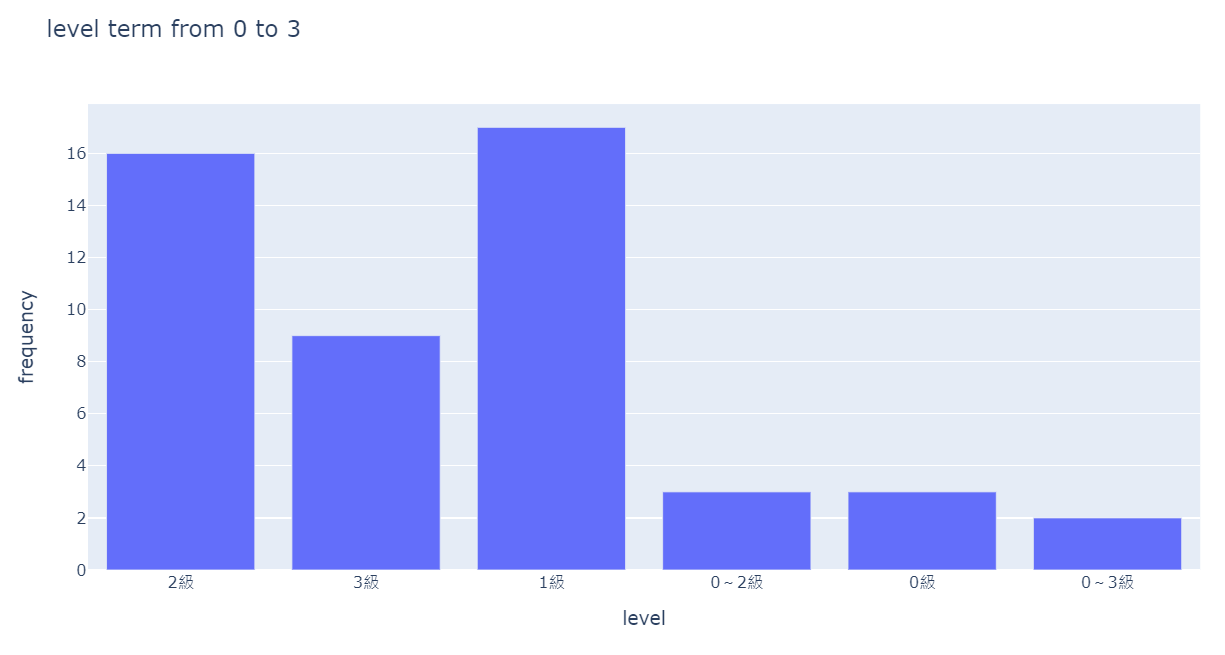

In [223]:
show_sub = orgdata['等級']=='1級'
subdata = orgdata[show_sub]
subdata

,縣市,自行車道路名稱,簡介,挑戰指數,總計長度,路面狀況,重點提醒,seg,等級
4,基隆市,北寧路自行車道,北寧路自行車道是由八斗子海濱公園，一直到平浪橋的這段自行車道。此段路程風光明媚，海天相伴，美...,1級。適合親子共遊，但上下橋請注意兒童安全。,從平浪橋段經潮境公園至八斗子海濱公園。全長2公里。,平整好騎。平浪橋有上坡，需有耐力。下坡時需注意安全。,全程無樹蔭，要注意防曬。附近無租車店家，需準備自行車。,"[好騎, 平浪橋, 耐力, 上坡, 下坡, 平整, 安全]",1級
5,基隆市,外木山濱海自行車步道,風景優美、沿海規劃的外木山濱海自行車道，是條寬3公尺、全長只有3公里的封閉型車道，它是基隆市...,1級。適合親子共遊。部分路段有上下坡，需注意兒童安全。,全長3公里,沿海有護欄，濱海而騎舒暢愜意。路面平整無坑洞。,全程少樹蔭，要注意防曬。附近無租車店家，需準備自行車，也需攜帶足夠的飲用水，隨時補充。,"[有護欄, 濱海, 舒暢, 愜意, 坑洞, 平整, 沿海]",1級
6,桃園縣,新屋鄉綠色隧道,新屋綠色走廊可說是北台灣最具規模的自行車專用道，利用防風林與海堤規劃而成的自行車道，遊客在綠...,1級。適合親子共遊。,北起永安漁港，南至蚵殼港，全長4公里。,柏油路面，人車分道，路面維護得極佳，很平整。,整段路無明顯上坡，兒童亦可獨自騎乘。綠色隧道兩端都有自行車可租借，但無甲地租車乙地還服務，須...,"[柏油路面, 人車分道, 平整]",1級
7,桃園縣,龍潭大池自行車道,龍潭大池原為老街溪中的一個深水潭，清朝乾隆13年，平埔族人欲引水灌溉農田，遂截堵溪水形成池塘...,1級。適合親子共遊。,單程長有2 . 7公里。,平均寬度約2公尺，以木棧道及AC路面鋪成，路況頗佳。,NaN,"[木棧道, AC路面]",1級
8,新竹市,新竹17公里海岸自行車道,到新竹，如果想來趟輕鬆的自行車行，到長達17公里的海岸風景區準沒錯！北起南寮漁港、南至南港賞...,1級。適合親子共遊。如欲一次騎完，則需有中程騎乘經驗較佳。,全長17公里，有多個出入口，有兒童共騎者可視體能決定騎乘距離。,全程以木棧道及柏油路面組成，平坦好騎。,全線配合地形，部分路段有上下坡，惟坡度不大。另自行車道往南過了紅樹林後，因水資源局處理中心施...,"[木棧道, 柏油路面, 好騎, 平坦]",1級
9,新竹縣,峨眉十二寮自行車道,峨眉湖因是重要水庫，湖邊受開發限制，得以保持原始風貌。民國90年湖畔規劃環湖步道，旅人可以騎...,1級。適合親子共遊。,5公里。,環湖公路平坦好騎，路面寬敞。,附近無租車店家，十二寮休閒農園有休閒自行車出租。有孩童隨行者可以在此租車。山區蚊蟲多，注意防蚊。,"[環湖, 好騎, 寬敞, 平坦, 公路]",1級
10,新竹縣,新豐紅樹林自行車道,新豐紅毛港海岸邊，就是新豐紅樹林自行車道的入口，遊客穿梭在木麻黃林間，聽著海潮聲輕鬆行，自行...,1級。適合親子共遊。,5公里。,柏油路面，無人車分道，防風林路段平整筆直。,該車道行經防風林，林蔭繁茂景色純樸，可盡享沿線漁家風情，可惜商家略少，需自備飲水。沿線雖無明...,"[柏油路面, 人車分道, 防風林, 筆直, 平整]",1級
11,苗栗縣,竹南海濱森林公園,位在竹南鎮西濱的竹南海濱森林公園，沿著海岸線的原始木麻黃、棕櫚樹林，規劃了一處適合全家共遊的...,1級。適合親子共遊,6.82公里。全程有三個休憩點，都備有小型車停車場。,水泥路面，沿途不乏綠蔭遮陽，但要小心防蚊。,附近幾無租車店家，最好自行攜帶自行車。龍鳳漁港及竹南濱海森林遊憩區假日時會有小販，但平日就得...,"[綠蔭, 遮陽, 防蚊, 水泥]",1級
16,台中市,環市自行車道鐵道、怡情之旅,這條延續大學、密林之旅的鐵道、怡情自行車道，展現另一種風情，利用鐵路意象，配合鋪面材料及街道...,1級。適合親子共遊。,由大智路至太原車站，全長5.1公里。,沿途道路平整，地圖明確，周邊商家林立，不必擔心補給問題。,太原車站有一租借點，若以大智路為起點則無租車店家。騎經路口時請注意交通號誌，並照顧隨行的孩童。,"[地圖, 補給, 平整, 商家]",1級
21,雲林縣,口湖濱海自行車道,這條由金湖延伸至台子的自行車道，是沿海規劃的幽靜車道，出海口生態非常豐富，遊客可欣賞海蚵農膠...,1級。適合親子共遊。,金湖段4公里，台子段3.31公里，全長7.31公里。,全線沿著漁塭規劃，皆為柏油路。,漁塭區的小路多，不過自行車道路面都有標示，沿著騎就不會錯。路面很寬敞且有護欄，但有幼兒同行仍...,[柏油路],1級


In [224]:
type(subdata['seg'])

pandas.core.series.Series

In [225]:
subdata_seg_list = subdata['seg'].tolist()
type(subdata_seg_list)

list

In [226]:
subdata_seg_list

[['好騎', '平浪橋', '耐力', '上坡', '下坡', '平整', '安全'],
 ['有護欄', '濱海', '舒暢', '愜意', '坑洞', '平整', '沿海'],
 ['柏油路面', '人車分道', '平整'],
 ['木棧道', 'AC路面'],
 ['木棧道', '柏油路面', '好騎', '平坦'],
 ['環湖', '好騎', '寬敞', '平坦', '公路'],
 ['柏油路面', '人車分道', '防風林', '筆直', '平整'],
 ['綠蔭', '遮陽', '防蚊', '水泥'],
 ['地圖', '補給', '平整', '商家'],
 ['柏油路'],
 ['好騎', '涼亭', '同遊', '改建', '全家', '平坦'],
 ['環潭', '好騎', '林蔭', '風光明媚', '平坦', '公路'],
 ['柏油路面', '順暢', '標誌', '平整'],
 ['沿運河', '柏油路面', '舒適', '照明'],
 ['柏油路面', '有橋面', '遮蔭', '水泥'],
 ['柏油路面', '好騎', '平坦'],
 ['指標', '柏油路', '分叉']]

In [227]:
# for 迴圈的另一寫法
flat = [x for sublist in subdata_seg_list for x in sublist]
diction = Counter(flat) # Counter：dict 的子類別，用來計算可雜湊 ( hashable ) 物件的數量
# 原本 for 迴圈寫法
# for sublist in subdata_seg_list:
#     for x in sublist:
#         flat.append(x)

In [228]:
diction.keys()

dict_keys(['好騎', '平浪橋', '耐力', '上坡', '下坡', '平整', '安全', '有護欄', '濱海', '舒暢', '愜意', '坑洞', '沿海', '柏油路面', '人車分道', '木棧道', 'AC路面', '平坦', '環湖', '寬敞', '公路', '防風林', '筆直', '綠蔭', '遮陽', '防蚊', '水泥', '地圖', '補給', '商家', '柏油路', '涼亭', '同遊', '改建', '全家', '環潭', '林蔭', '風光明媚', '順暢', '標誌', '沿運河', '舒適', '照明', '有橋面', '遮蔭', '指標', '分叉'])

In [229]:
type(diction)

collections.Counter

In [247]:
diction

Counter({'好騎': 6,
         '平浪橋': 1,
         '耐力': 1,
         '上坡': 1,
         '下坡': 1,
         '平整': 6,
         '安全': 1,
         '有護欄': 1,
         '濱海': 1,
         '舒暢': 1,
         '愜意': 1,
         '坑洞': 1,
         '沿海': 1,
         '柏油路面': 7,
         '人車分道': 2,
         '木棧道': 2,
         'AC路面': 1,
         '平坦': 5,
         '環湖': 1,
         '寬敞': 1,
         '公路': 2,
         '防風林': 1,
         '筆直': 1,
         '綠蔭': 1,
         '遮陽': 1,
         '防蚊': 1,
         '水泥': 2,
         '地圖': 1,
         '補給': 1,
         '商家': 1,
         '柏油路': 2,
         '涼亭': 1,
         '同遊': 1,
         '改建': 1,
         '全家': 1,
         '環潭': 1,
         '林蔭': 1,
         '風光明媚': 1,
         '順暢': 1,
         '標誌': 1,
         '沿運河': 1,
         '舒適': 1,
         '照明': 1,
         '有橋面': 1,
         '遮蔭': 1,
         '指標': 1,
         '分叉': 1})

In [231]:
from PIL import Image # PIL：影像處理套件
import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [232]:
import numpy as np

In [233]:
mask = np.array(Image.open("Black_Circle.jpg")) # 想呈現的圖案形狀
font = "C:\Windows\Fonts\mingliu.ttc" # 選取想呈現字體的字體路徑

[有些字體呈現中文會出現亂碼或直接不顯示](http://tech.smallya.net/2021/12/20/python-matplotlib%E4%B8%AD%E6%96%87%E8%B2%A0%E6%95%B8%E4%BA%82%E7%A2%BC/)

In [234]:
 # 把文字變成圖片(文字雲)
wordcloud = WordCloud(background_color = "white", font_path=font, mask = mask)
wordcloud.generate_from_frequencies(diction)

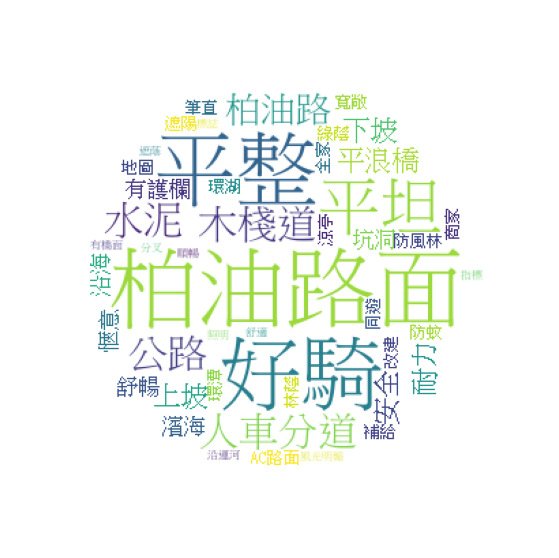

In [235]:
# 調圖片的大小顯示圖片
plt.figure(figsize=(10,10))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

-----------------------
． 遇到的問題

[提取關鍵字](https://ithelp.ithome.com.tw/articles/10204535)
>
> 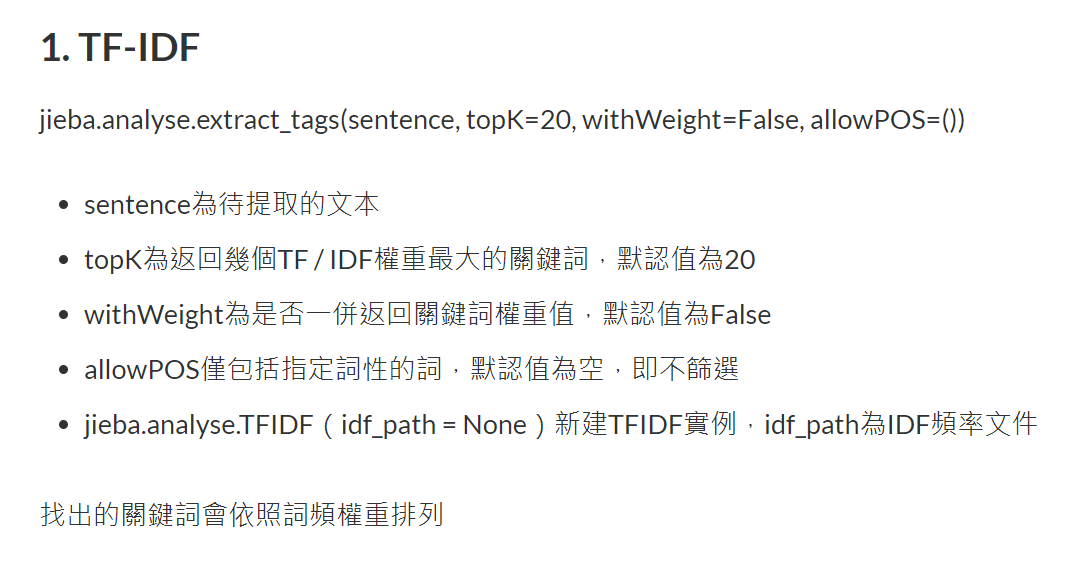

ModuleNotFoundError: No module named ‘xxx’
>
> 沒有引入‘xxx’套件
> eg. 沒有引入'wordcloud'套件
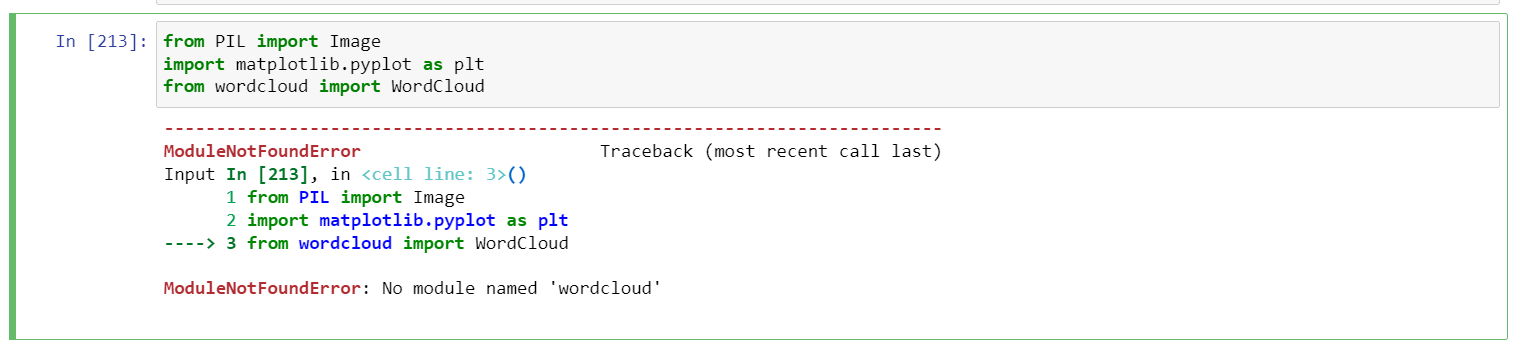

In [262]:
seg_f = diction

In [263]:
seg_f

Counter({'好騎': 6,
         '平浪橋': 1,
         '耐力': 1,
         '上坡': 1,
         '下坡': 1,
         '平整': 6,
         '安全': 1,
         '有護欄': 1,
         '濱海': 1,
         '舒暢': 1,
         '愜意': 1,
         '坑洞': 1,
         '沿海': 1,
         '柏油路面': 7,
         '人車分道': 2,
         '木棧道': 2,
         'AC路面': 1,
         '平坦': 5,
         '環湖': 1,
         '寬敞': 1,
         '公路': 2,
         '防風林': 1,
         '筆直': 1,
         '綠蔭': 1,
         '遮陽': 1,
         '防蚊': 1,
         '水泥': 2,
         '地圖': 1,
         '補給': 1,
         '商家': 1,
         '柏油路': 2,
         '涼亭': 1,
         '同遊': 1,
         '改建': 1,
         '全家': 1,
         '環潭': 1,
         '林蔭': 1,
         '風光明媚': 1,
         '順暢': 1,
         '標誌': 1,
         '沿運河': 1,
         '舒適': 1,
         '照明': 1,
         '有橋面': 1,
         '遮蔭': 1,
         '指標': 1,
         '分叉': 1})

In [253]:
show1_key = pd.DataFrame(Counter(seg_f).keys())
show1_values = pd.DataFrame(Counter(seg_f).values())

In [265]:
df = [show1_key, show1_values]

In [266]:
result = pd.concat(df, axis=1)
# concat 裡的 axis 預設是 0，也就是你的資料是會往下長。設成1，是想讓資料往橫的方向長。
result.columns = ['key', 'frequency']
result

,key,frequency
0,好騎,6
1,平浪橋,1
2,耐力,1
3,上坡,1
4,下坡,1
5,平整,6
6,安全,1
7,有護欄,1
8,濱海,1
9,舒暢,1


In [267]:
import plotly.express as px
import pandas as pd

px.bar(result, x='key', y='frequency', title='frequency of each key')

In [257]:
from PIL import Image # PIL：影像處理套件
import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [258]:
import numpy as np

In [259]:
mask = np.array(Image.open("black_rectangle.png")) # 想呈現的圖案形狀
font = "C:\Windows\Fonts\mingliu.ttc" # 選取想呈現字體的字體路徑

In [260]:
 # 把文字變成圖片(文字雲)
wordcloud = WordCloud(background_color = "white", font_path=font, mask = mask)
wordcloud.generate_from_frequencies(diction)

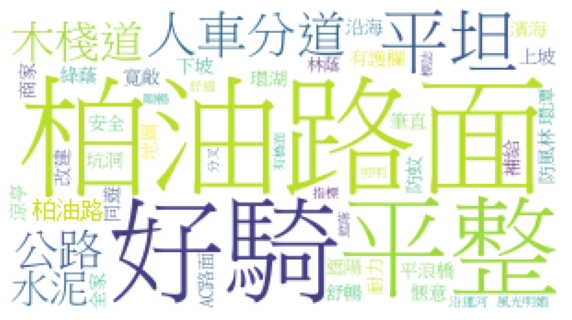

In [261]:
# 調圖片的大小顯示圖片
plt.figure(figsize=(10,10))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

參考資料
>
> [各縣市自行車道路資訊](https://data.gov.tw/dataset/8187)
>
> [Pandas索引的運用](https://ithelp.ithome.com.tw/articles/10194006?sc=hot)
>
> [什麼是文字探勘](https://www.tibco.com/zh-hant/reference-center/what-is-text-mining)
>
> [C6_Python_文字探勘](https://github.com/pecu/LawTech/tree/main/2021LawTech/Learning-Materials/C6_Python_%E6%96%87%E5%AD%97%E6%8E%A2%E5%8B%98)
>
> [TextMining](https://github.com/pecu/LawTech/blob/main/2021LawTech/Learning-Materials/C6_Python_%E6%96%87%E5%AD%97%E6%8E%A2%E5%8B%98/TextMining.ipynb)
>
> [regular expression](https://blog.techbridge.cc/2020/05/14/introduction-to-regular-expression/)
>
> [pandas.concat用法](https://www.796t.com/content/1545045061.html)
>
> [Pandas官網用法整理](https://pandas.pydata.org/pandas-docs/stable/user_guide/merging.html)
>
> [矩陣圖片互相轉換](https://medium.com/@e105208024/python%E5%B0%8F%E5%B7%A5%E5%85%B7-%E7%9F%A9%E9%99%A3%E5%9C%96%E7%89%87%E4%BA%92%E7%9B%B8%E8%BD%89%E6%8F%9B-7572ef5285a6)

工具網站
>
> [regex比對](https://regex101.com/)

